In [1]:
import csv
from sklearn.linear_model import enet_path
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plot

In [4]:
labels = []
xData = []
names = []

lineCount = 0
with open("sentinel-1-data.csv", newline='') as csvfile:
    data = csv.reader(csvfile, delimiter='\t')
    for line in data:
        if lineCount == 0:
            lineCount += 1
        elif lineCount == 1:
            lineCount +=1
            names = line[1:]
        else:
            labels.append(float(line[4]))
            line.pop(4)
            xData.append(line[4:6])

print(names, "\n")
print(xData[0:5], "\n")
print(labels[0:10])

['s1-band_1_S_M_M_M:byte', 's1-band_2_S_M_M_M:byte', 's1-band_3_S_M_M_M:byte', 'corine-band_1_S_M_M:byte', 'Sigma0_VH_S_M:float', 'Sigma0_VV_S_M:float'] 

[['0.0041300976', '0.038428165'], ['0.0053010504', '0.039246254'], ['0.0063511413', '0.036630318'], ['0.008793158', '0.031356815'], ['0.00862046', '0.031219995']] 

[12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0]


In [5]:
rowCount = len(xData)
columnCount = len(xData[0])
print("rowCount:", rowCount, "columnCount:", columnCount)
print(len(labels))
for i in range(len(labels)):
    if 1 <= labels[i] <= 11:
        labels[i] = 1
    elif 12 <= labels[i] <= 22:
        labels[i] = 2
    elif 23 <= labels[i] <= 34:
        labels[i] = 3
    elif 35 <= labels[i] <= 39:
        labels[i] = 4
    else:
        labels[i] = 5
labelset = set(labels)
print("Label set:")
print(labelset)

rowCount: 34485262 columnCount: 2
34485262
Label set:
{1, 2, 3, 4, 5}


In [6]:
x_train, x_test, y_train, y_test = train_test_split(xData, labels, test_size=0.3)

misClassError = []
for iTrees in [20]:
    #iTrees += 1
    print("iTrees:", iTrees)
    rsModel = ensemble.RandomForestClassifier(n_estimators=iTrees, random_state=0)
    rsModel.fit(x_train, y_train)
    result = rsModel.predict(x_test)
    correct = accuracy_score(y_test, result)
    misClassError.append(1.0 - correct)
    print("Cor, Misclassification Error")
    print(correct, misClassError[-1])

    pList = result.tolist()
    confusionMat = confusion_matrix(y_test, pList)
    print("")
    print("Confusion Matrix")
    print(confusionMat)
    print("")

iTrees: 20
Cor, Misclassification Error
0.765220486935 0.234779513065

Confusion Matrix
[[   3903   70502  187989     281    1988]
 [   7514 2263910 1134757    5614   12181]
 [  11300  702844 5311134    2469   57617]
 [    344   44917   38155    1146    2015]
 [    746   38879  108661     157  336556]]



[0 1]
['s1-band_1_S_M_M_M:byte', 's1-band_2_S_M_M_M:byte', 's1-band_3_S_M_M_M:byte', 'corine-band_1_S_M_M:byte', 'Sigma0_VH_S_M:float', 'Sigma0_VV_S_M:float']
6
17
['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B10', 'B11', 'B12', 's1-red', 's1-green', 's1-blue', 'band-4']
['B1', 'B2']


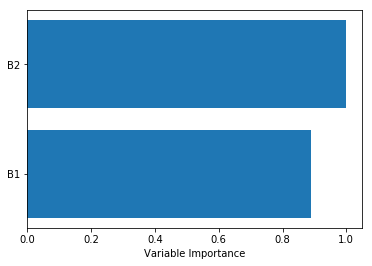

In [7]:
featureImportance = rsModel.feature_importances_
featureImportance = featureImportance / featureImportance.max()
idxSorted = np.argsort(featureImportance)
print(idxSorted)
print(names)
print(len(names))
names = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B10', 'B11', 'B12', 's1-red','s1-green','s1-blue', 'band-4']
print(len(names))
print(names)
names2 = []
for i in idxSorted:
    names2.append(names[i])
print(names2)
barPos = np.arange(idxSorted.shape[0]) + .5
plot.barh(barPos, featureImportance[idxSorted], align='center')
plot.yticks(barPos, names2)
plot.xlabel('Variable Importance')
plot.show()

In [7]:
print(result[0:100])

[3 3 3 3 2 3 3 3 3 3 3 3 2 2 2 3 2 3 3 3 3 2 3 3 3 3 5 3 2 3 2 3 3 2 3 2 2
 2 2 2 2 3 3 2 2 3 2 2 3 3 3 3 2 2 5 3 3 3 3 2 3 2 3 3 2 3 3 2 3 2 2 3 3 2
 3 3 3 3 3 3 3 3 2 3 2 2 3 3 3 3 3 3 2 3 3 2 3 3 2 2]


In [8]:
rgblist = []
for row in result:
    if result == 1:
        rgblist.append([255,0,0])
    elif result == 2:
        rgblist.append([255,255,0])
    elif result == 3:
        rgblist.append([])

ModuleNotFoundError: No module named 'jpeg'